In [30]:
# %matplotlib notebook

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [32]:
t = 200
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_200K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7']) 

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [33]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df['B'] = df['B_int']
df = df[["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000,200.011076,7499.527590,-7499.828795,6634.007549,-6634.098116,7500.416687,-7500.430965,6634.059665,-6633.877378,-0.000002,1000000
1,0.001,9000,200.005476,7500.294860,-7500.358003,6634.339433,-6634.253366,7500.435355,-7500.443889,6634.113879,-6633.959081,-0.000002,1000000
2,0.001,8000,200.000456,7500.459116,-7500.332453,6634.390523,-6634.389510,7500.573987,-7500.560160,6634.381639,-6634.098388,-0.000002,1000000
3,0.001,7000,200.000223,7500.591662,-7500.541000,6634.540751,-6634.504513,7500.699652,-7500.721187,6634.455616,-6634.336091,-0.000002,1000000
4,0.001,6000,200.001008,7500.662678,-7500.660802,6634.599420,-6634.639126,7500.871058,-7500.815474,6634.623185,-6634.453093,-0.000002,1000000


In [34]:
df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

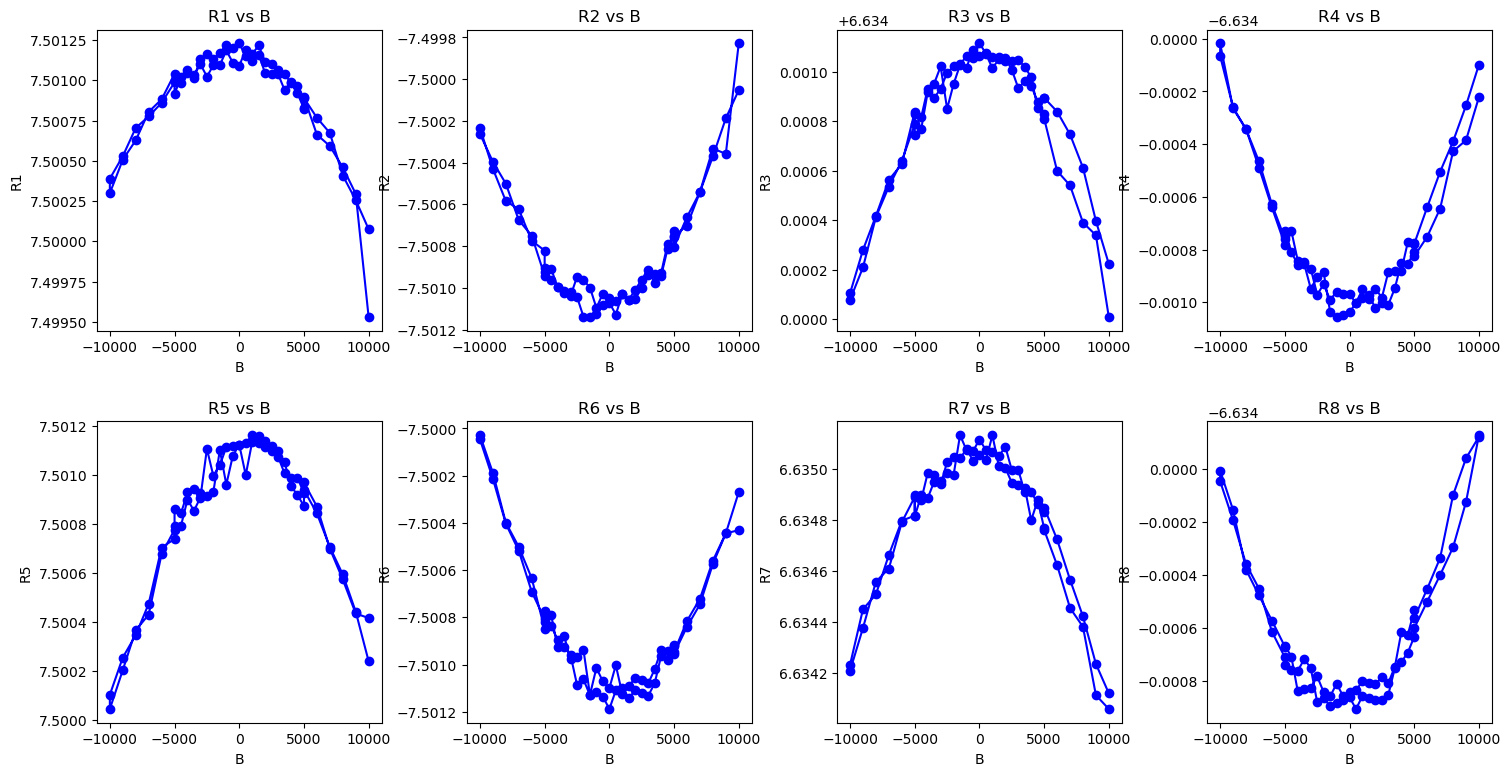

In [35]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(2,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(2,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(2,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(2,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(2,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(2,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## MR Calculation without Field correction

### Ra -> Average Resistance of Two opposite sides

### Rb -> Average Resistance of Other two opposite sides

### R -> Average Resistance

In [36]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

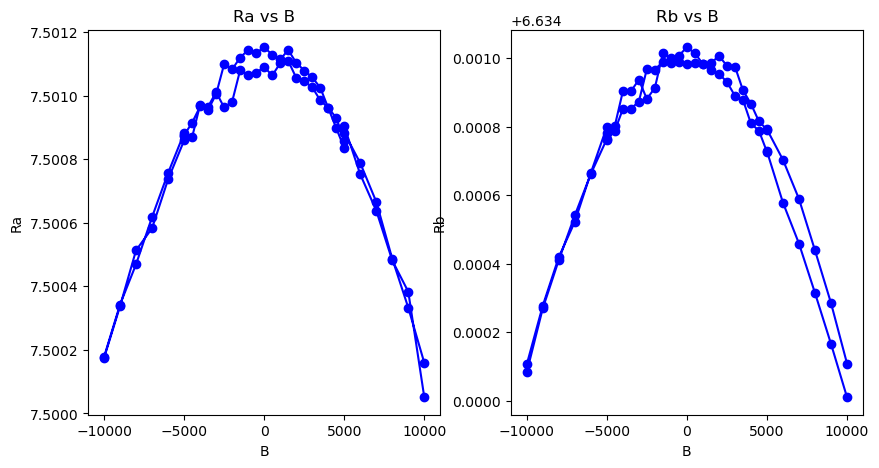

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['B'], df['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(df['B'], df['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

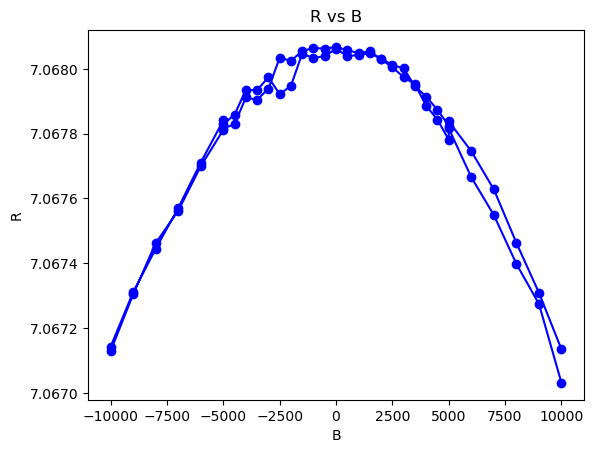

In [38]:
plt.plot(df['B'], df['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [39]:
Ra0 = df.loc[df['B'] == 0]['Ra'].mean()
Rb0 = df.loc[df['B'] == 0]['Rb'].mean()
R0 = df.loc[df['B'] == 0]['R'].mean()

df['MRa'] = ((df['Ra'] - Ra0)*100)/Ra0
df['MRb'] = ((df['Rb'] - Rb0)*100)/Rb0
df['MR'] = ((df['R'] - R0)*100)/R0

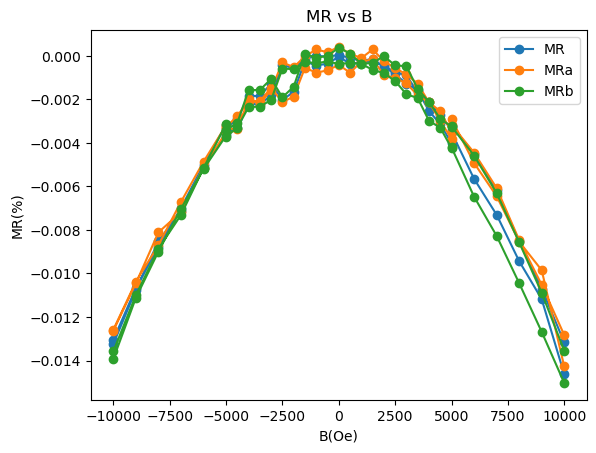

(None, 100, 10, 200)

In [40]:
plt.plot(df['B'], df['MR'], 'o-', label = "MR")
plt.plot(df['B'], df['MRa'], 'o-', label = "MRa")
plt.plot(df['B'], df['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show(), 100, 10, 200

# MR calculation with Field Correction

Averageing the current Reverse part

In [41]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [42]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df.head()

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,7499.678192,6634.052832,7500.423826,6633.968522,1000000
1,0.001,9000,7500.326431,6634.296399,7500.439622,6634.036480,1000000
2,0.001,8000,7500.395785,6634.390016,7500.567073,6634.240014,1000000
3,0.001,7000,7500.566331,6634.522632,7500.710419,6634.395853,1000000
4,0.001,6000,7500.661740,6634.619273,7500.843266,6634.538139,1000000


In [43]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [44]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec Field dataset

In [45]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)
data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 
data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [46]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [47]:
data_dec.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,10000,7499.678192,6634.052832,7500.423826,6633.968522,7500.311452,6634.048051,7500.037129,6634.119389,1000000,7499.994822,6634.050442,7500.230478,6634.043955
34,0.001,9000,7500.326431,6634.296399,7500.439622,6634.036480,7500.479047,6634.237176,7500.196409,6634.302973,1000000,7500.402739,6634.266788,7500.318016,6634.169727
68,0.001,8000,7500.395785,6634.390016,7500.567073,6634.240014,7500.644043,6634.378042,7500.382895,6634.444434,1000000,7500.519914,6634.384029,7500.474984,6634.342224
102,0.001,7000,7500.566331,6634.522632,7500.710419,6634.395853,7500.699613,6634.512371,7500.466086,6634.570883,1000000,7500.632972,6634.517501,7500.588253,6634.483368
136,0.001,6000,7500.661740,6634.619273,7500.843266,6634.538139,7500.817175,6634.640018,7500.655971,6634.685264,1000000,7500.739458,6634.629645,7500.749618,6634.611701


In [48]:
# data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Field Dataset

In [49]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)
data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 
data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [50]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [51]:
data_inc.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,-10000,7500.311452,6634.048051,7500.037129,6634.119389,7499.678192,6634.052832,7500.423826,6633.968522,1000000,7499.994822,6634.050442,7500.230478,6634.043955
34,0.001,-9000,7500.479047,6634.237176,7500.196409,6634.302973,7500.326431,6634.296399,7500.439622,6634.036480,1000000,7500.402739,6634.266788,7500.318016,6634.169727
68,0.001,-8000,7500.644043,6634.378042,7500.382895,6634.444434,7500.395785,6634.390016,7500.567073,6634.240014,1000000,7500.519914,6634.384029,7500.474984,6634.342224
102,0.001,-7000,7500.699613,6634.512371,7500.466086,6634.570883,7500.566331,6634.522632,7500.710419,6634.395853,1000000,7500.632972,6634.517501,7500.588253,6634.483368
136,0.001,-6000,7500.817175,6634.640018,7500.655971,6634.685264,7500.661740,6634.619273,7500.843266,6634.538139,1000000,7500.739458,6634.629645,7500.749618,6634.611701


### Stacking both the datas

In [52]:
data = pd.concat([data_dec,data_inc])

In [53]:
data['Ra'] = (data['V15'] + data['V37'])/(2*data['I']*data['multiplier'])
data['Rb'] = (data['V26'] + data['V48'])/(2*data['I']*data['multiplier'])
data['R'] = (data['Ra'] + data['Rb'])/2

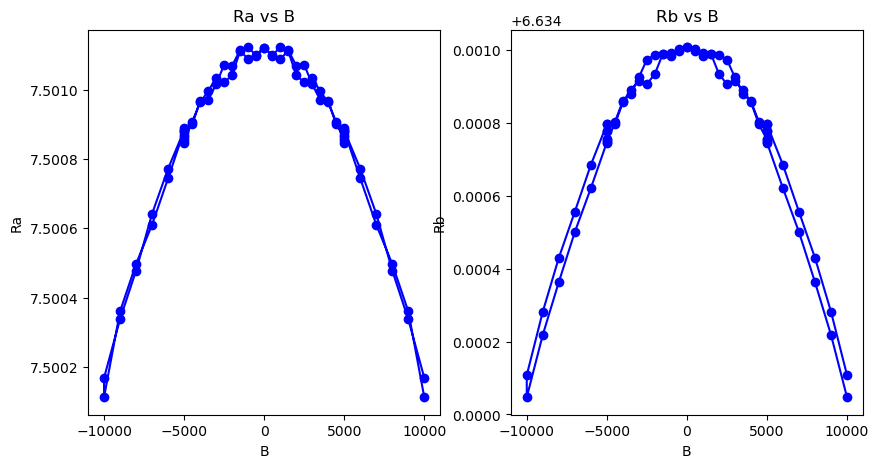

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(data['B'], data['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(data['B'], data['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

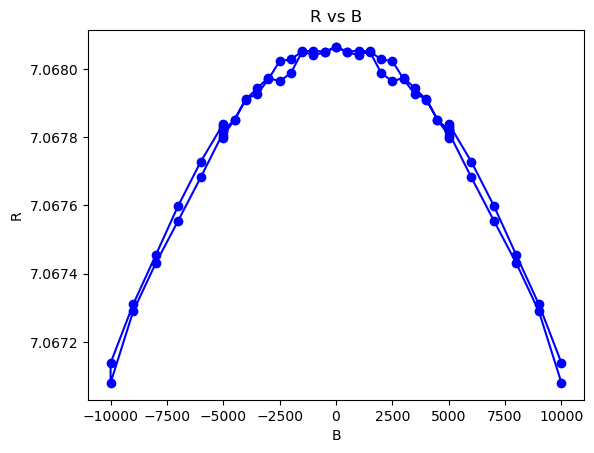

In [55]:
plt.plot(data['B'],data['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [56]:
Ra0 = data.loc[data['B'] == 0]['Ra'].mean()
Rb0 = data.loc[data['B'] == 0]['Rb'].mean()
R0 = data.loc[data['B'] == 0]['R'].mean()

data['MRa'] = ((data['Ra'] - Ra0)*100)/Ra0
data['MRb'] = ((data['Rb'] - Rb0)*100)/Rb0
data['MR'] = ((data['R'] - R0)*100)/R0

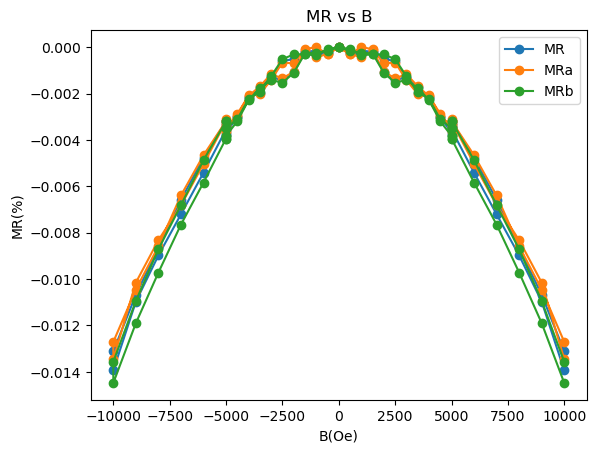

In [57]:
plt.plot(data['B'], data['MR'], 'o-', label = "MR")
plt.plot(data['B'], data['MRa'], 'o-', label = "MRa")
plt.plot(data['B'], data['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show()

In [58]:
data.to_pickle(f"./pickle_data/MR_{t}K.pkl")